In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
sns.set_style('dark')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_regression
from scipy.stats import pearsonr
from scipy import stats
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
data=pd.read_csv("/content/train-chennai-sale.csv")
data

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [3]:
data.shape

(7109, 22)

In [4]:
data.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [5]:
data.describe()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
count,7109.000000,7109.000000,7108.000000,7104.000000,7109.000000,7109.000000,7109.000000,7109.000000,7061.000000,7109.000000,7109.000000,7.109000e+03
mean,1382.073006,99.603179,1.637029,1.213260,3.688704,3.517471,3.507244,3.485300,3.503254,376938.330708,141005.726544,1.089491e+07
std,457.410902,57.403110,0.802902,0.409639,1.019099,0.891972,0.897834,0.887266,0.527223,143070.662010,78768.093718,3.768603e+06
min,500.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,71177.000000,5055.000000,2.156875e+06
25%,993.000000,50.000000,1.000000,1.000000,3.000000,2.700000,2.700000,2.700000,3.130000,272406.000000,84219.000000,8.272100e+06
50%,1373.000000,99.000000,1.000000,1.000000,4.000000,3.500000,3.500000,3.500000,3.500000,349486.000000,127628.000000,1.033505e+07
75%,1744.000000,148.000000,2.000000,1.000000,4.000000,4.300000,4.300000,4.300000,3.890000,451562.000000,184506.000000,1.299390e+07
max,2500.000000,200.000000,4.000000,2.000000,6.000000,5.000000,5.000000,5.000000,4.970000,983922.000000,495405.000000,2.366734e+07


In [6]:
df = pd.read_csv("/content/train-chennai-sale.csv")
print(df.columns)
print('The total number of features:',df.shape[1])

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')
The total number of features: 22


In [7]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [8]:
df.shape

(7109, 22)

In [9]:
categorical_features = [x for x in df.columns 
                if not (df[x].dtype == np.float64 
                        or df[x].dtype == np.int64)]
print(categorical_features)

['PRT_ID', 'AREA', 'DATE_SALE', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD', 'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE']


In [10]:
numerical_features=[x for x in df.columns if df[x].dtype==np.int64 or df[x].dtype==np.float64]
print(numerical_features)

['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'QS_ROOMS', 'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS', 'SALES_PRICE']


In [11]:
pd.DataFrame(df.isnull().sum()).T

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,0,0,0,0,0,1,5,0,0,0,...,0,0,0,0,0,0,48,0,0,0


In [12]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].mean())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].mean())
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())
df['N_BEDROOM'] = np.floor(df['N_BEDROOM'])
df['N_BATHROOM'] = np.floor(df['N_BATHROOM'])

In [13]:
pd.DataFrame((df.isnull().sum())).T

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
df['AREA']

0       Karapakkam
1       Anna Nagar
2            Adyar
3        Velachery
4       Karapakkam
           ...    
7104    Karapakkam
7105     Velachery
7106     Velachery
7107    Karapakkam
7108     Velachery
Name: AREA, Length: 7109, dtype: object

In [15]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [16]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [17]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [18]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [19]:
df.PARK_FACIL.unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [20]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [21]:
df['PARK_FACIL'].replace(['Noo'],['No'],inplace=True)
df['STREET'].replace(['Pavd','NoAccess'],['Paved','No Access'],inplace=True)
df['UTILITY_AVAIL'].replace(['NoSewr ','NoSeWa','All Pub'],['No Sewer','No Sewer','AllPub'],inplace=True)
df['BUILDTYPE'].replace(['Comercial','Other'],['Commercial','Others'],inplace=True)
df['SALE_COND'].replace(['Ab Normal','Partiall','PartiaLl','Adj Land'],['AbNormal','Partial','Partial','AdjLand'],inplace=True)
df['AREA'].replace(['Ana Nagar','Ann Nagar','Karapakam','Chrompt','Chrmpet','Chormpet','Adyr','Velchery','KKNagar','TNagar'],
['Anna Nagar','Anna Nagar','Karapakkam','Chrompet','Chrompet','Chrompet','Adyar','Velachery','KK Nagar','T Nagar'],
inplace=True)

In [22]:
df.AREA.unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [23]:
df.STREET.unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [24]:
df.PARK_FACIL.unique()

array(['Yes', 'No'], dtype=object)

In [25]:
df.SALE_COND.unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [26]:
df.UTILITY_AVAIL.unique()

array(['AllPub', 'ELO', 'No Sewer'], dtype=object)

In [27]:
df.BUILDTYPE.unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [28]:
df['DATE_SALE']=pd.to_datetime(df['DATE_SALE'])
df['DATE_BUILD']=pd.to_datetime(df['DATE_BUILD'])
pd.DataFrame(df.dtypes.value_counts()).T

,object,int64,float64,datetime64[ns]
0,8,6,6,2


In [29]:
import datetime
datestring= "04-05-2011"
date= datetime.datetime.strptime(datestring,"%d-%m-%Y")
date

datetime.datetime(2011, 5, 4, 0, 0)

In [30]:
df["DATE_SALE"]= pd.to_datetime(df["DATE_SALE"], format= "%d-%m-%Y")

In [31]:
df["DATE_SALE"].values[0]

numpy.datetime64('2011-04-05T00:00:00.000000000')

In [32]:
df["DATE_BUILD"]= pd.to_datetime(df["DATE_BUILD"], format= "%d-%m-%Y")

In [33]:
df['HOUSE_LIFETIME'] = df['DATE_SALE'] .subtract( df['DATE_BUILD'])

In [34]:
df['HOUSE_LIFETIME']= df['HOUSE_LIFETIME'].dt.days

In [35]:
df['HOUSE_LIFETIME'].values[0]

16031

In [36]:
df.dtypes

PRT_ID                    object
AREA                      object
INT_SQFT                   int64
DATE_SALE         datetime64[ns]
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
SALE_COND                 object
PARK_FACIL                object
DATE_BUILD        datetime64[ns]
BUILDTYPE                 object
UTILITY_AVAIL             object
STREET                    object
MZZONE                    object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
REG_FEE                    int64
COMMIS                     int64
SALES_PRICE                int64
HOUSE_LIFETIME             int64
dtype: object

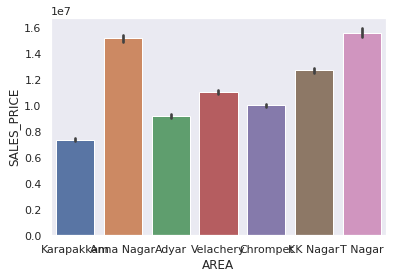

In [37]:
sns.barplot(x=df["AREA"] , y= df["SALES_PRICE"])

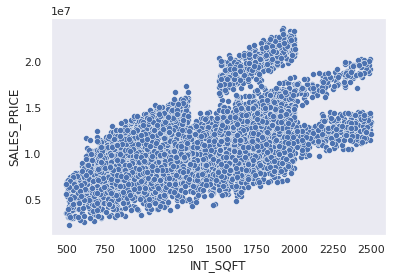

In [96]:
sns.scatterplot(x=df["INT_SQFT"],y=df["SALES_PRICE"])

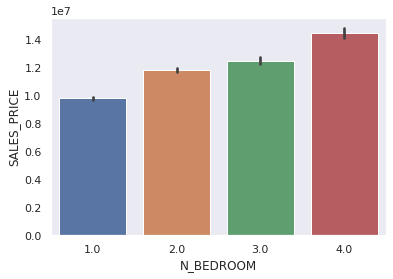

In [39]:
sns.barplot(x=df["N_BEDROOM"] , y= df["SALES_PRICE"])

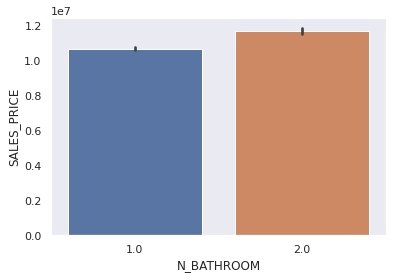

In [40]:
sns.barplot(x= df["N_BATHROOM"], y= df["SALES_PRICE"])

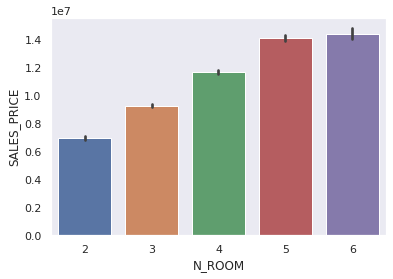

In [41]:
sns.barplot(x=df["N_ROOM"], y= df["SALES_PRICE"])

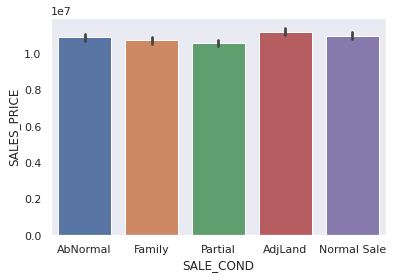

In [42]:
sns.barplot(x= df["SALE_COND"], y=df["SALES_PRICE"])

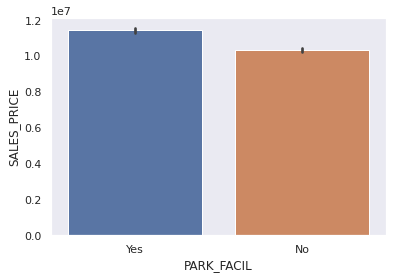

In [43]:
sns.barplot(x= df["PARK_FACIL"], y=df["SALES_PRICE"])

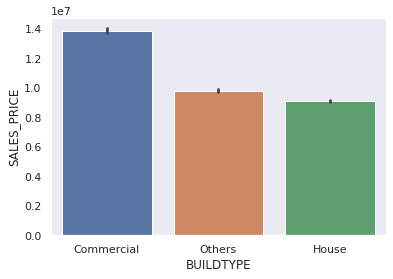

In [44]:
sns.barplot(x= df["BUILDTYPE"], y= df["SALES_PRICE"])

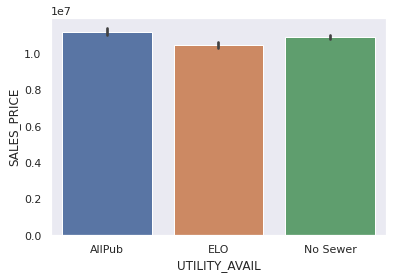

In [45]:
sns.barplot(x= df["UTILITY_AVAIL"], y= df["SALES_PRICE"])

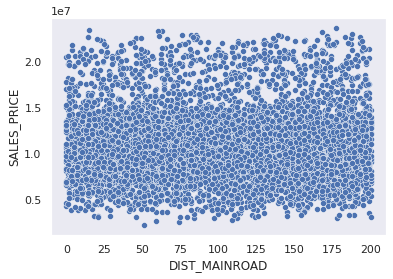

In [46]:
sns.scatterplot(x= df["DIST_MAINROAD"],y= df["SALES_PRICE"])

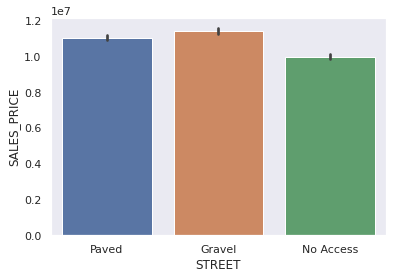

In [47]:
sns.barplot(x= df["STREET"], y= df["SALES_PRICE"])

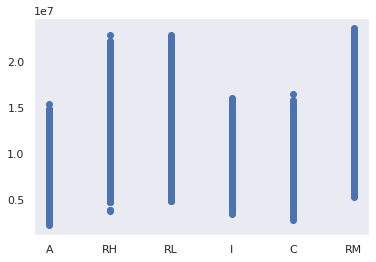

In [48]:
plt.scatter(df["MZZONE"], df["SALES_PRICE"],marker="o")

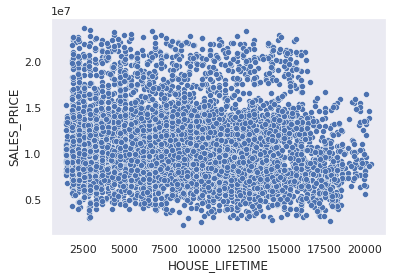

In [49]:
sns.scatterplot(x= df['HOUSE_LIFETIME'], y= df["SALES_PRICE"])

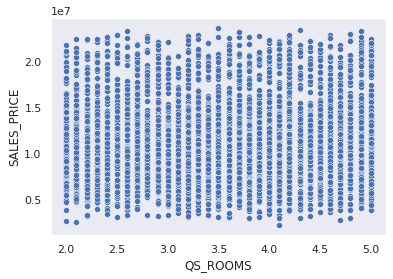

In [50]:
sns.scatterplot(x= df["QS_ROOMS"],y= df["SALES_PRICE"])

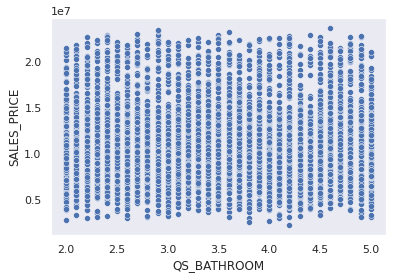

In [51]:
sns.scatterplot(x= df["QS_BATHROOM"],y= df["SALES_PRICE"])

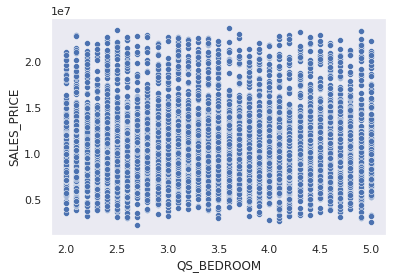

In [52]:
sns.scatterplot(x= df["QS_BEDROOM"],y= df["SALES_PRICE"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


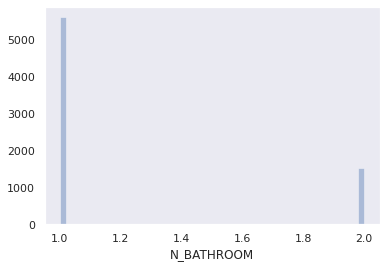

In [53]:
sns.distplot(df['N_BATHROOM'], kde= False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


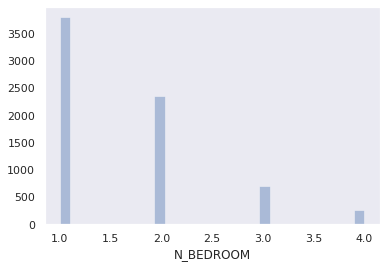

In [54]:
sns.distplot(df['N_BEDROOM'], kde= False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


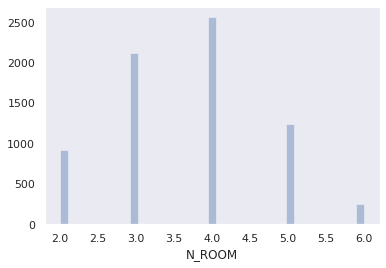

In [55]:
sns.distplot(df['N_ROOM'], kde= False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


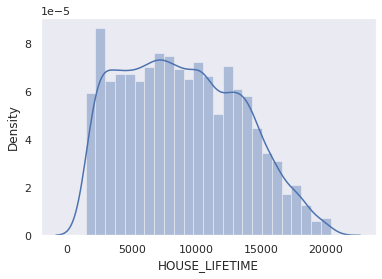

In [56]:
sns.distplot(df['HOUSE_LIFETIME'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


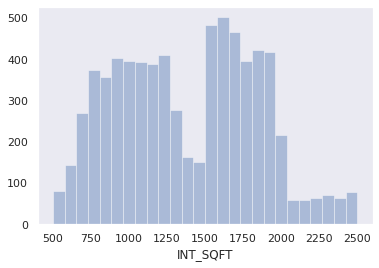

In [57]:
sns.distplot(df['INT_SQFT'], kde= False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


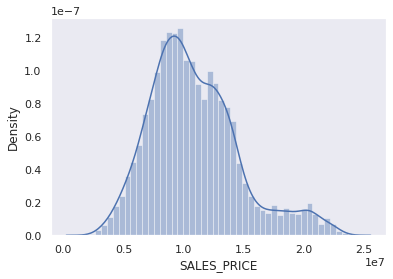

In [58]:
sns.distplot(df['SALES_PRICE'])

In [59]:
df= df.drop(columns=[ "PRT_ID"],axis=1)

In [60]:
df= df.drop(columns=[ "COMMIS"],axis=1)

In [61]:
df= df.drop(columns=[ "REG_FEE"],axis=1)

In [62]:
df.columns.T

Index(['AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'HOUSE_LIFETIME'],
      dtype='object')

In [63]:
df.dtypes

AREA                      object
INT_SQFT                   int64
DATE_SALE         datetime64[ns]
DIST_MAINROAD              int64
N_BEDROOM                float64
N_BATHROOM               float64
N_ROOM                     int64
SALE_COND                 object
PARK_FACIL                object
DATE_BUILD        datetime64[ns]
BUILDTYPE                 object
UTILITY_AVAIL             object
STREET                    object
MZZONE                    object
QS_ROOMS                 float64
QS_BATHROOM              float64
QS_BEDROOM               float64
QS_OVERALL               float64
SALES_PRICE                int64
HOUSE_LIFETIME             int64
dtype: object

In [64]:
df= df.drop(columns=[ "DATE_SALE"],axis=1)

In [65]:
df= df.drop(columns=[ "DATE_BUILD"],axis=1)

In [66]:
dummies1 = pd.get_dummies(df.AREA)

In [67]:
df["PARK_FACIL"].unique()  

array(['Yes', 'No'], dtype=object)

In [68]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [69]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [70]:
df["MZZONE"].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

In [71]:
dummies2 = pd.get_dummies(df["SALE_COND"])

In [72]:
dummies3 = pd.get_dummies(df["UTILITY_AVAIL"])

In [73]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
df["PARK_FACIL"] = lb.fit_transform(df["PARK_FACIL"])
df["BUILDTYPE"] = lb.fit_transform(df["BUILDTYPE"])
df["STREET"] = lb.fit_transform(df["STREET"])
df["MZZONE"] = lb.fit_transform(df["MZZONE"])

In [74]:
df= pd.concat([df,dummies1,dummies2, dummies3], axis="columns")
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,...,T Nagar,Velachery,AbNormal,AdjLand,Family,Normal Sale,Partial,AllPub,ELO,No Sewer
0,Karapakkam,1004,131,1.0,1.0,3,AbNormal,1,0,AllPub,...,0,0,1,0,0,0,0,1,0,0
1,Anna Nagar,1986,26,2.0,1.0,5,AbNormal,0,0,AllPub,...,0,0,1,0,0,0,0,1,0,0
2,Adyar,909,70,1.0,1.0,3,AbNormal,1,0,ELO,...,0,0,1,0,0,0,0,0,1,0
3,Velachery,1855,14,3.0,2.0,5,Family,0,2,No Sewer,...,0,1,0,0,1,0,0,0,0,1
4,Karapakkam,1226,84,1.0,1.0,3,AbNormal,1,2,AllPub,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,51,1.0,1.0,2,AdjLand,0,2,ELO,...,0,0,0,1,0,0,0,0,1,0
7105,Velachery,1897,52,3.0,2.0,5,Family,1,2,No Sewer,...,0,1,0,0,1,0,0,0,0,1
7106,Velachery,1614,152,2.0,1.0,4,Normal Sale,0,1,No Sewer,...,0,1,0,0,0,1,0,0,0,1
7107,Karapakkam,787,40,1.0,1.0,2,Partial,1,0,ELO,...,0,0,0,0,0,0,1,0,1,0


In [75]:
df.dtypes

AREA               object
INT_SQFT            int64
DIST_MAINROAD       int64
N_BEDROOM         float64
N_BATHROOM        float64
N_ROOM              int64
SALE_COND          object
PARK_FACIL          int64
BUILDTYPE           int64
UTILITY_AVAIL      object
STREET              int64
MZZONE              int64
QS_ROOMS          float64
QS_BATHROOM       float64
QS_BEDROOM        float64
QS_OVERALL        float64
SALES_PRICE         int64
HOUSE_LIFETIME      int64
Adyar               uint8
Anna Nagar          uint8
Chrompet            uint8
KK Nagar            uint8
Karapakkam          uint8
T Nagar             uint8
Velachery           uint8
AbNormal            uint8
AdjLand             uint8
Family              uint8
Normal Sale         uint8
Partial             uint8
AllPub              uint8
ELO                 uint8
No Sewer            uint8
dtype: object

In [76]:
df= df.drop(columns=["AREA", "SALE_COND", "UTILITY_AVAIL"], axis= 1)

In [77]:
df.columns

Index(['INT_SQFT', 'DIST_MAINROAD', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM',
       'PARK_FACIL', 'BUILDTYPE', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'SALES_PRICE',
       'HOUSE_LIFETIME', 'Adyar', 'Anna Nagar', 'Chrompet', 'KK Nagar',
       'Karapakkam', 'T Nagar', 'Velachery', 'AbNormal', 'AdjLand', 'Family',
       'Normal Sale', 'Partial', 'AllPub', 'ELO', 'No Sewer'],
      dtype='object')

In [78]:
df.shape

(7109, 30)

In [79]:
X= df.drop("SALES_PRICE", axis= "columns")
Y= df["SALES_PRICE"]

In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.2, random_state=10)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

In [82]:
X_train.shape, X_test.shape

((5687, 29), (1422, 29))

In [83]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.8332330689858042

In [84]:
Y_pred= lr.predict(X_test)
Y_pred

array([14862772.46218923, 17160847.6836461 , 15980107.66663143, ...,
        6477899.3801468 , 16772657.86917634,  7475860.61602318])

In [85]:
print(lr.intercept_)

10905946.036574643


In [86]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"]) 
Y_predict= lr.predict(X_test)
coef_df

,Coefficient
INT_SQFT,1.761203e+06
DIST_MAINROAD,1.858794e+04
N_BEDROOM,1.469287e+05
N_BATHROOM,-2.177169e+05
N_ROOM,2.728199e+05
PARK_FACIL,5.360996e+05
BUILDTYPE,-1.613232e+06
STREET,-1.810363e+05
MZZONE,9.054003e+05
QS_ROOMS,-1.792173e+04


In [87]:
coef_df= pd.DataFrame(lr.coef_, X.columns, columns=["Coefficient"]) 
Y_predict= lr.predict(X_test)
coef_df

,Coefficient
INT_SQFT,1.761203e+06
DIST_MAINROAD,1.858794e+04
N_BEDROOM,1.469287e+05
N_BATHROOM,-2.177169e+05
N_ROOM,2.728199e+05
PARK_FACIL,5.360996e+05
BUILDTYPE,-1.613232e+06
STREET,-1.810363e+05
MZZONE,9.054003e+05
QS_ROOMS,-1.792173e+04


In [88]:
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt= DecisionTreeRegressor(max_depth= depth)
  dt.fit(X_train, Y_train)
  accuracy= r2_score(Y_test,dt.predict(X_test))
  dt= DecisionTreeRegressor(max_depth= depth)
  val= cross_val_score(dt, X, Y, cv=10)
  print(depth, accuracy, np.mean(val))

1 0.32063988560410317 0.30713886240518135
2 0.616924254685371 0.6213648238688929
3 0.7713930375238999 0.7657288337185907
4 0.8319178171278744 0.8326160885726509
5 0.8873726092431242 0.8866877866664096
6 0.9229687215047412 0.9199890524212504
7 0.9395377591221487 0.9402513686644633
8 0.9519142085495956 0.9510686829102181
9 0.9580427132314759 0.9569570950591239
10 0.9571036218876056 0.9599944091213393
20 0.9587625366155323 0.9597725037730818
40 0.9556328810139403 0.9593347044797149
60 0.9566656679973723 0.9590239638841433


In [89]:
X.shape, X_test.shape, X_train.shape  

((7109, 29), (1422, 29), (5687, 29))

In [90]:
dt= DecisionTreeRegressor(max_depth= 10)
dt.fit(X_train, Y_train)
importances = list(dt.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(list(X.columns), importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('INT_SQFT', 0.4),
 ('BUILDTYPE', 0.33),
 ('MZZONE', 0.11),
 ('Karapakkam', 0.07),
 ('T Nagar', 0.03),
 ('PARK_FACIL', 0.02),
 ('Anna Nagar', 0.02),
 ('STREET', 0.01),
 ('KK Nagar', 0.01),
 ('Velachery', 0.01),
 ('DIST_MAINROAD', 0.0),
 ('N_BEDROOM', 0.0),
 ('N_BATHROOM', 0.0),
 ('N_ROOM', 0.0),
 ('QS_ROOMS', 0.0),
 ('QS_BATHROOM', 0.0),
 ('QS_BEDROOM', 0.0),
 ('QS_OVERALL', 0.0),
 ('HOUSE_LIFETIME', 0.0),
 ('Adyar', 0.0),
 ('Chrompet', 0.0),
 ('AbNormal', 0.0),
 ('AdjLand', 0.0),
 ('Family', 0.0),
 ('Normal Sale', 0.0),
 ('Partial', 0.0),
 ('AllPub', 0.0),
 ('ELO', 0.0),
 ('No Sewer', 0.0)]

In [91]:
dt= DecisionTreeRegressor(max_depth= 10)
dt.fit(X_train, Y_train)
pred= dt.predict(X_test)
accuracy= r2_score(Y_test,pred)
print(accuracy) 

0.9566143180022071


In [92]:
df2= pd.DataFrame({"Actual": Y_test, "Predicted": pred})
df2

,Actual,Predicted
461,15664740,1.514177e+07
3358,19286610,1.801117e+07
3751,13308490,1.396335e+07
2386,12496560,1.182512e+07
1125,9082000,8.357375e+06
...,...,...
6010,13104880,1.319122e+07
4903,14083210,1.363012e+07
6806,6835375,6.843219e+06
3832,14154820,1.276215e+07


In [93]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for lr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model = xgb.XGBRegressor(learning_rate = lr, n_estimators=100, verbosity = 0) 
  model.fit(X_train,Y_train) 
  model.score(X_test, Y_test) 
  print("Learning rate : ", lr, " Train score : ", model.score(X_test,Y_test), " Cross-Val score : ", np.mean(cross_val_score(model, X_train, Y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3891133107754232  Cross-Val score :  -0.43318438625192934
Learning rate :  0.02  Train score :  0.7300841147515876  Cross-Val score :  0.7216878594082303
Learning rate :  0.03  Train score :  0.9131825062642472  Cross-Val score :  0.9090260589026677
Learning rate :  0.04  Train score :  0.9542118827695107  Cross-Val score :  0.95129073838943
Learning rate :  0.05  Train score :  0.9690674761069576  Cross-Val score :  0.9661692747403563
Learning rate :  0.1  Train score :  0.9896416635236956  Cross-Val score :  0.9879663528061331
Learning rate :  0.11  Train score :  0.9909940033523685  Cross-Val score :  0.9894317590463357
Learning rate :  0.12  Train score :  0.9921900391933254  Cross-Val score :  0.9907114591398717
Learning rate :  0.13  Train score :  0.9929313833856926  Cross-Val score :  0.9914783559149288
Learning rate :  0.14  Train score :  0.9931151753711402  Cross-Val score :  0.9920760703120681
Learning rate :  0.15  Train score :  0.

In [94]:
model = xgb.XGBRegressor(learning_rate = 0.2, n_estimators=50, verbosity = 0)
model.fit(X_train,Y_train)

importances = list(model.feature_importances_)

feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(list(X.columns), importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
feature_importances

[('N_ROOM', 0.35867),
 ('BUILDTYPE', 0.14189),
 ('Karapakkam', 0.11987),
 ('INT_SQFT', 0.09104),
 ('Anna Nagar', 0.0736),
 ('T Nagar', 0.05676),
 ('MZZONE', 0.05339),
 ('Velachery', 0.03857),
 ('PARK_FACIL', 0.02152),
 ('N_BEDROOM', 0.01347),
 ('STREET', 0.01089),
 ('HOUSE_LIFETIME', 0.00428),
 ('Partial', 0.00375),
 ('KK Nagar', 0.0036),
 ('AdjLand', 0.0036),
 ('AllPub', 0.00201),
 ('Adyar', 0.00129),
 ('ELO', 0.00102),
 ('N_BATHROOM', 0.00045),
 ('QS_OVERALL', 0.00033),
 ('DIST_MAINROAD', 0.0),
 ('QS_ROOMS', 0.0),
 ('QS_BATHROOM', 0.0),
 ('QS_BEDROOM', 0.0),
 ('Chrompet', 0.0),
 ('AbNormal', 0.0),
 ('Family', 0.0),
 ('Normal Sale', 0.0),
 ('No Sewer', 0.0)]